In [1]:
from keras.datasets.cifar10 import load_data
#load the images into memory
(trainX,trainy),(testX,testy)=load_data()
#summarize the shape of the dataset
print('Train',trainX.shape,trainy.shape)
print('Test',testX.shape,testy.shape)

Using TensorFlow backend.


Train (50000, 32, 32, 3) (50000, 1)
Test (10000, 32, 32, 3) (10000, 1)


In [2]:
#example of loading and plotting the cifar10 dataset
from keras.datasets.cifar10 import load_data
from matplotlib import pyplot
#load the images into memory
(trainX,trainy),(testX,testy)=load_data()
#plot images from the training dataset
for i in range(49):
    #define subplot
    pyplot.subplot(7,7,1+i)
    #turn off axis
    pyplot.axis('off')
    #plot raw pixel data
    pyplot.imshow(trainX[i])
pyplot.show()

<Figure size 640x480 with 49 Axes>

Instructions for updating:
Colocations handled automatically by placer.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 256)         295168    
_________________________________________________________________
flatten_1 (Flatten)          (None, 16384)             0         
________________________________________________

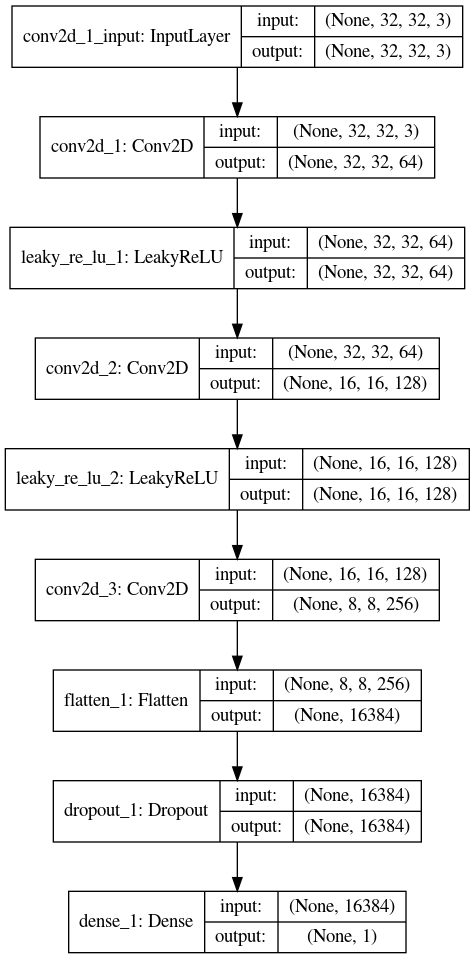

In [3]:
#defining the discriminator model
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import LeakyReLU
from keras.utils.vis_utils import plot_model
#define the standalone discriminator model
def define_discriminator(in_shape=(32,32,3)):
    model=Sequential()
    #normal
    model.add(Conv2D(64,(3,3),padding='same',input_shape=in_shape))
    model.add(LeakyReLU(alpha=0.2))
    #downsample
    model.add(Conv2D(128,(3,3),strides=(2,2),padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    #downsample
    model.add(Conv2D(256,(3,3),strides=(2,2),padding='same'))
    #classifier
    model.add(Flatten())
    model.add(Dropout(0.4))
    model.add(Dense(1,activation='sigmoid'))
    #compile model
    opt=Adam(lr=0.0002,beta_1=0.5)
    model.compile(loss='binary_crossentropy',optimizer=opt,metrics=['accuracy'])
    return model
#define model
model=define_discriminator()
#summarize the model
model.summary()
#plot the model
plot_model(model,to_file='discriminator_plot.png',show_shapes=True,show_layer_names=True)


In [4]:
from numpy import expand_dims
from numpy import ones
from numpy import zeros
from numpy.random import rand
from numpy.random import randint
#defining the discriminator model
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import LeakyReLU
from keras.utils.vis_utils import plot_model
#define the standalone discriminator model
def define_discriminator(in_shape=(32,32,3)):
    model=Sequential()
    #normal
    model.add(Conv2D(64,(3,3),padding='same',input_shape=in_shape))
    model.add(LeakyReLU(alpha=0.2))
    #downsample
    model.add(Conv2D(128,(3,3),strides=(2,2),padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    #downsample
    model.add(Conv2D(128,(3,3),strides=(2,2),padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Conv2D(256,(3,3),strides=(2,2),padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    #classifier
    model.add(Flatten())
    model.add(Dropout(0.4))
    model.add(Dense(1,activation='sigmoid'))
    #compile model
    opt=Adam(lr=0.0002,beta_1=0.5)
    model.compile(loss='binary_crossentropy',optimizer=opt,metrics=['accuracy'])
    return model
#load and prepare cifar10 training images
def load_real_samples():
    #load cifar10 dataset
    (trainX,_),(_,_)=load_data()
    #convert from unsigned ints to floats
    X=trainX.astype('float32')
    #scale from[0,255] to[-1,1]
    X=(X-127.5)/127.5
    return X
#select real samples
def generate_real_samples(dataset,n_samples):
    #choose random instances
    ix=randint(0,dataset.shape[0],n_samples)
    #retrieve selected images
    X=dataset[ix]
    #generate 'real' class labels(1)
    y=ones((n_samples,1))
    return X,y
#generate n fake samples with class labels
def generate_fake_samples(n_samples):
    #generate uniform random numbers in [0,1]
    X=rand(32*32*3*n_samples)
    #update to have the range[-1,1]
    X=-1+X*2
    #reshape into a batch of color images
    X=X.reshape((n_samples,32,32,3))
    #generate 'fake ' class labels(0)
    y=zeros((n_samples,1))
    return X,y
#train the discriminator model
def train_discriminator(model,dataset,n_iter=20,n_batch=128):
    half_batch=int(n_batch/2)
    #manually enumerate epochs
    for i in range(n_iter):
        #get randomly selected 'real' samples
        X_real,y_real=generate_real_samples(dataset,half_batch)
        #update discriminator on real samples
        _,real_acc=model.train_on_batch(X_real,y_real)
        #generate 'fake' examples
        X_fake,y_fake=generate_fake_samples(half_batch)
        #update discriminator on fake samples
        _,fake_acc=model.train_on_batch(X_fake,y_fake)
        #summarize performance
        print('>%d real=%.0f%%fake=%.0f%%'%(i+1,real_acc*100,fake_acc*100))
        
#define model
model=define_discriminator()
#load image data
dataset=load_real_samples()
#fit the model
train_discriminator(model,dataset)



Instructions for updating:
Use tf.cast instead.
>1 real=19%fake=5%
>2 real=83%fake=27%
>3 real=78%fake=64%
>4 real=88%fake=91%
>5 real=89%fake=95%
>6 real=89%fake=100%
>7 real=89%fake=100%
>8 real=91%fake=100%
>9 real=88%fake=100%
>10 real=92%fake=100%
>11 real=92%fake=100%
>12 real=97%fake=100%
>13 real=98%fake=100%
>14 real=100%fake=100%
>15 real=100%fake=100%
>16 real=100%fake=100%
>17 real=98%fake=100%
>18 real=100%fake=100%
>19 real=100%fake=100%
>20 real=100%fake=100%


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 4096)              413696    
_________________________________________________________________
leaky_re_lu_7 (LeakyReLU)    (None, 4096)              0         
_________________________________________________________________
reshape_1 (Reshape)          (None, 4, 4, 256)         0         
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 8, 8, 128)         524416    
_________________________________________________________________
leaky_re_lu_8 (LeakyReLU)    (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_transpose_2 (Conv2DTr (None, 16, 16, 128)       262272    
_________________________________________________________________
leaky_re_lu_9 (LeakyReLU)    (None, 16, 16, 128)      

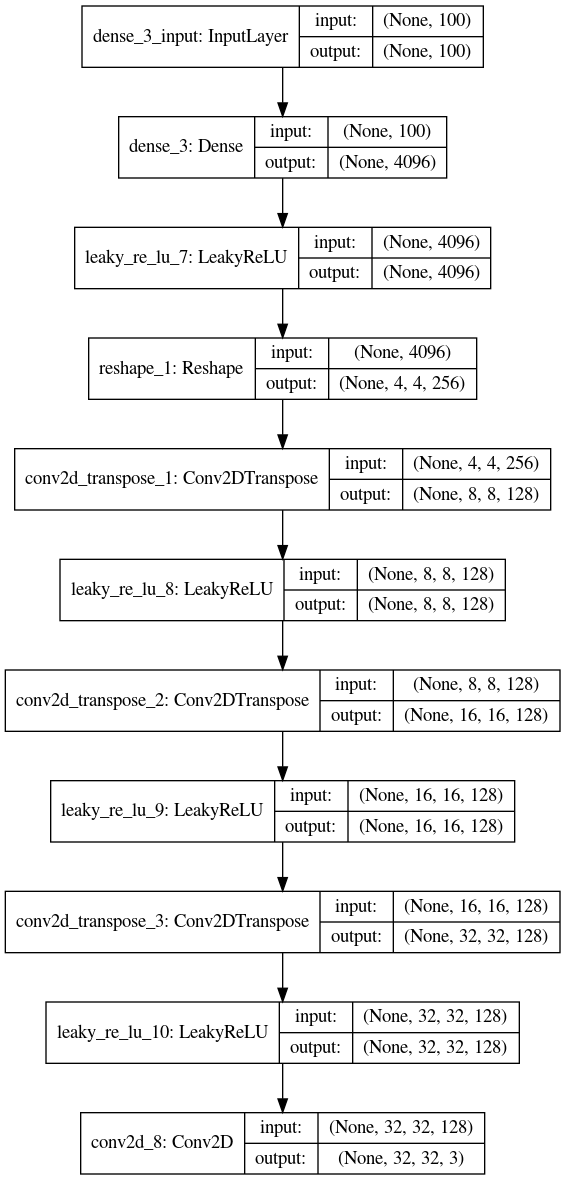

In [5]:
from keras.layers import Reshape
from keras.layers import Conv2DTranspose
#define the standalone generator model
def define_generator(latent_dim):
    model=Sequential()
    #foundations for 4*4 image
    n_nodes=256*4*4
    model.add(Dense(n_nodes,input_dim=latent_dim))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Reshape((4,4,256)))
    #upsample to 8*8
    model.add(Conv2DTranspose(128,(4,4),strides=(2,2),padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    #unsample to 16*16
    model.add(Conv2DTranspose(128,(4,4),strides=(2,2),padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    #unsample to 32*32
    model.add(Conv2DTranspose(128,(4,4),strides=(2,2),padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    #output layer
    model.add(Conv2D(3,(3,3),activation='tanh',padding='same'))
    return model
#define the size of the latent space
latent_dim=100
#define the generator model
model=define_generator(latent_dim)
#summarize the model
model.summary()
#plot the model
plot_model(model,to_file='generator_plot.png',show_shapes=True,show_layer_names=True)

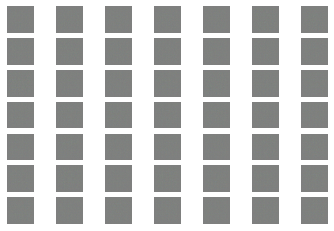

In [6]:
from numpy.random import randn
def define_generator(latent_dim):
    model=Sequential()
    #foundations for 4*4 image
    n_nodes=256*4*4
    model.add(Dense(n_nodes,input_dim=latent_dim))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Reshape((4,4,256)))
    #upsample to 8*8
    model.add(Conv2DTranspose(128,(4,4),strides=(2,2),padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    #unsample to 16*16
    model.add(Conv2DTranspose(128,(4,4),strides=(2,2),padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    #unsample to 32*32
    model.add(Conv2DTranspose(128,(4,4),strides=(2,2),padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    #output layer
    model.add(Conv2D(3,(3,3),activation='tanh',padding='same'))
    return model
#generate points in latent space as input for the generator
def generate_latent_points(latent_dim,n_samples):
    #generate points in the latent space
    x_input=randn(latent_dim*n_samples)
    #reshape into a batch of inputs for the network
    x_input=x_input.reshape(n_samples,latent_dim)
    return x_input
#use the generator to generate n fake examples,with class labels
def generate_fake_samples(g_model,latent_dim,n_samples):
    #generate points in latent space
    x_input=generate_latent_points(latent_dim,n_samples)
    #predict outputs
    X=g_model.predict(x_input)
    #create'fake' class labels(0)
    y=zeros((n_samples,1))
    return X,y
#size of the latent space
latent_dim=100
#define the disceiminator model
model=define_generator(latent_dim)
#generate samples
n_samples=49
X,_=generate_fake_samples(model,latent_dim,n_samples)
#scale pixel values from[-1,1] to [0,1]
X=(X+1)/2.0
#plot the generated samples
for i in range(n_samples):
    #define subplot
    pyplot.subplot(7,7,1+i)
    #turn off axis labels
    pyplot.axis('off')
    #plot single image
    pyplot.imshow(X[i])
#show the figure
pyplot.show()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_6 (Sequential)    (None, 32, 32, 3)         1466115   
_________________________________________________________________
sequential_5 (Sequential)    (None, 1)                 522497    
Total params: 1,988,612
Trainable params: 1,466,115
Non-trainable params: 522,497
_________________________________________________________________


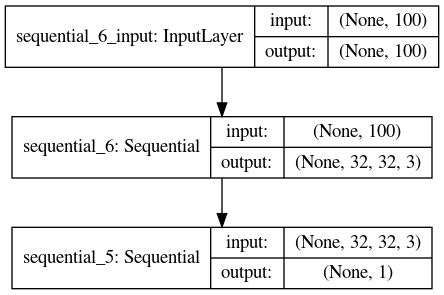

In [7]:
from keras.optimizers import Adam
def define_discriminator(in_shape=(32,32,3)):
    model=Sequential()
    #normal
    model.add(Conv2D(64,(3,3),padding='same',input_shape=in_shape))
    model.add(LeakyReLU(alpha=0.2))
    #downsample
    model.add(Conv2D(128,(3,3),strides=(2,2),padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    #downsample
    model.add(Conv2D(128,(3,3),strides=(2,2),padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Conv2D(256,(3,3),strides=(2,2),padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    #classifier
    model.add(Flatten())
    model.add(Dropout(0.4))
    model.add(Dense(1,activation='sigmoid'))
    #compile model
    opt=Adam(lr=0.0002,beta_1=0.5)
    model.compile(loss='binary_crossentropy',optimizer=opt,metrics=['accuracy'])
    return model
def define_generator(latent_dim):
    model=Sequential()
    #foundations for 4*4 image
    n_nodes=256*4*4
    model.add(Dense(n_nodes,input_dim=latent_dim))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Reshape((4,4,256)))
    #upsample to 8*8
    model.add(Conv2DTranspose(128,(4,4),strides=(2,2),padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    #unsample to 16*16
    model.add(Conv2DTranspose(128,(4,4),strides=(2,2),padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    #unsample to 32*32
    model.add(Conv2DTranspose(128,(4,4),strides=(2,2),padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    #output layer
    model.add(Conv2D(3,(3,3),activation='tanh',padding='same'))
    return model
#define the combined generator and discriminator model,for updating the generator
def define_gan(g_model,d_model):
    #make weights in the discriminator not trainable
    d_model.trainable=False
    #connect them
    model=Sequential()
    #add generator
    model.add(g_model)
    #add the discriminator
    model.add(d_model)
    #compile model
    opt=Adam(lr=0.0002,beta_1=0.5)
    model.compile(loss='binary_crossentropy',optimizer=opt)
    return model
#size of the latent space
latent_dim=100
#create the discriminator
d_model=define_discriminator()
#create the generator
g_model=define_generator(latent_dim)
#create the gan
gan_model=define_gan(g_model,d_model)
#summarize gan model
gan_model.summary()
#plot gan model
plot_model(gan_model,to_file='gan_plot.png',show_shapes=True,show_layer_names=True)

In [ ]:
from numpy import expand_dims
from keras.optimizers import Adam
def define_discriminator(in_shape=(32,32,3)):
    model=Sequential()
    #normal
    model.add(Conv2D(64,(3,3),padding='same',input_shape=in_shape))
    model.add(LeakyReLU(alpha=0.2))
    #downsample
    model.add(Conv2D(128,(3,3),strides=(2,2),padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    #downsample
    
    model.add(Conv2D(256,(3,3),strides=(2,2),padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    #classifier
    model.add(Flatten())
    model.add(Dropout(0.4))
    model.add(Dense(1,activation='sigmoid'))
    #compile model
    opt=Adam(lr=0.0002,beta_1=0.5)
    model.compile(loss='binary_crossentropy',optimizer=opt,metrics=['accuracy'])
    return model
def define_generator(latent_dim):
    model=Sequential()
    #foundations for 4*4 image
    n_nodes=256*4*4
    model.add(Dense(n_nodes,input_dim=latent_dim))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Reshape((4,4,256)))
    #upsample to 8*8
    model.add(Conv2DTranspose(128,(4,4),strides=(2,2),padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    #unsample to 16*16
    model.add(Conv2DTranspose(128,(4,4),strides=(2,2),padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    #unsample to 32*32
    model.add(Conv2DTranspose(128,(4,4),strides=(2,2),padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    #output layer
    model.add(Conv2D(3,(3,3),activation='tanh',padding='same'))
    return model
#define the combined generator and discriminator model,for updating the generator
def define_gan(g_model,d_model):
    #make weights in the discriminator not trainable
    d_model.trainable=False
    #connect them
    model=Sequential()
    #add generator
    model.add(g_model)
    #add the discriminator
    model.add(d_model)
    #compile model
    opt=Adam(lr=0.0002,beta_1=0.5)
    model.compile(loss='binary_crossentropy',optimizer=opt)
    return model
def load_real_samples():
    #load cifar10 dataset
    (trainX,_),(_,_)=load_data()
    #convert from unsigned ints to floats
    X=trainX.astype('float32')
    #scale from[0,255] to[-1,1]
    X=(X-127.5)/127.5
    return X
#select real samples
def generate_real_samples(dataset,n_samples):
    #choose random instances
    ix=randint(0,dataset.shape[0],n_samples)
    #retrieve selected images
    X=dataset[ix]
    #generate 'real' class labels(1)
    y=ones((n_samples,1))
    return X,y
def generate_latent_points(latent_dim,n_samples):
    #generate points in the latent space
    x_input=randn(latent_dim*n_samples)
    #reshape into a batch of inputs for the network
    x_input=x_input.reshape(n_samples,latent_dim)
    return x_input

#generate n fake samples with class labels
def generate_fake_samples(n_samples):
    #generate uniform random numbers in [0,1]
    X=rand(32*32*3*n_samples)
    #update to have the range[-1,1]
    X=-1+X*2
    #reshape into a batch of color images
    X=X.reshape((n_samples,32,32,3))
    #generate 'fake ' class labels(0)
    y=zeros((n_samples,1))
    return X,y
#create and save plot of generated images
def save_plot(examples,epoch,n=7):
    #scale from [-1,1] to [0,1]
    examples=(examples+1)/2.0
    #plot images
    for i in range(n*n):
        #define subplot
        pyplot.subplot(n,n,1+i)
        #turn off axis
        pyplot.axis('off')
        #plot raw pixel data
        pyplot.imshow(examples[i])
    #save plot to file
    filename='generated_plot_e%03d.png'%(epoch+1)
    pyplot.savefig(filename)
    pyplot.close()
#evaluate the discriminator,plot generated images,save generated model
def summarize_performance(epoch,g_model,d_model,dataset,latent_dim,n_samples=150):
    #prepare real samples
    X_real,y_real=generate_real_samples(dataset,n_samples)
    #evaluate discriminator on real examples
    _,acc_real=d_model.evaluate(X_real,y_real,verbose=0)
    #prepare fake examples
    X_fake,y_fake=generate_fake_samples(g_model,latent_dim,n_samples)
    #evaluate discriminator on fake samples
    _,acc_fake=d_model.evaluate(x_fake,y_fake,verbose=0)
    #summarize discriminator performance
    print('>Accuracy real:%.0f%%,fake:%.0f%%'%(acc_real*100,acc_fake*100))
    #save plot
    save_plot(x_fake,epoch)
    #save the generator model title file
    filename='generator_model_%03d.h5'%(epoch+1)
    g_model.save(filename)
#train the generator and discriminator
def train(g_model,d_model,gan_model,dataset,latent_dim,n_epochs=200,n_batch=128):
    bat_per_epo=int(dataset.shape[0]/n_batch)
    half_batch=int(n_batch/2)
    #manually enumerate epochs
    for i in range(n_epochs):
        #enumerate batches over the training set
        for j in range(bat_per_epo):
            #get randomly selected 'real' samples
            X_real,y_real=generate_real_samples(dataset,half_batch)
            #update discriminator model weights
            d_loss1,_=d_model.train_on_batch(X_real,y_real)
            #generate 'fake' examples
            X_fake,y_fake=generate_fake_samples(half_batch)
            #update discriminator model weights
            d_loss2,_=d_model.train_on_batch(X_fake,y_fake)
            #prepare points in latent space as input for the generator
            X_gan=generate_latent_points(latent_dim,n_batch)
            #create inverted labels for the fake samples
            y_gan=ones((n_batch,1))
            #update the generator via the discriminator's error
            g_loss=gan_model.train_on_batch(X_gan,y_gan)
            #summarize loss on this batch
            print('>%d,%d/%d,d1=%.3f,d2=%.3f g=%.3f'%(i+1,j+1,bat_per_epo,d_loss1,d_loss2,g_loss))
        #evaluate the model performance
        if(i+1)%10==0:
            summarize_performance(i,g_model,d_model,dataset,latent_dim)
    

#size of the latent space
latent_dim=100
#create the discriminator
d_model=define_discriminator()
#create the generator
g_model=define_generator(latent_dim)
#create the gan
gan_model=define_gan(g_model,d_model)
dataset=load_real_samples()
train(g_model,d_model,gan_model,dataset,latent_dim)


/home/sastri/anaconda3/lib/python3.7/site-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


>1,1/390,d1=0.700,d2=0.750 g=0.692
>1,2/390,d1=0.649,d2=0.739 g=0.691
>1,3/390,d1=0.641,d2=0.702 g=0.690


In [ ]:
from keras.models import load_model
from numpy.random import randn
from matplotlib import pyplot
#generate points in latent space as input for the generator
def generate_latent_points(latent_dim,n_samples):
    #generate points in the latent space
    x_input=randn(latent_dim*n_samples)
    #reshape into a batch of inputs for the network
    x_input=x_input.reshape(n_samples,latent_dim)
    return x_input
#def the generated images
def create_plot(examples,n):
    #plot images
    for i in range(n*n):
        #define subplot
        pyplot.subplot(n,n,1+i)
        #turn off axis
        pyplot.axis('off')
        #plot raw pixel data
        pyplot.imshow(examples[i,:,:])
    pyplot.show()
#load model
model=load_model('generator_model_200.h5')
#generate images
latent_points=generate_latent_points(100,100)
#generate images
X=model.predict(latent_points)
#scale from[-1,1]to [0,1]
X=(X+1)/2.0
#plot the result
create_plot(X,10)

In [ ]:
from keras.models import load_model
from numpy import asarray
from matplotlib import pyplot
#load model
model=load_model('generator_model_200.h5')
#all 0s
vector=asarray([[0.75 for _ in range(100)]])
#generate image
X=model.predict(vector)
#scale from [-1,1]to [0,1]
X=(X+1)/2.0
#plot the reasult
pyplot.imshow(X[0,:,:])
pyplot.show()